In [1]:
import pickle as p
(my_network, my_time_series) = p.load(open('data/GPSData.p', 'rb'))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import detrend

def plot_station_time_series(name, ts, min_time = None, max_time = None, min_u = None, max_u = None):
    this_ts = None
    for station in ts:
        if station.name == name:
            this_ts = station
            break
    if this_ts is None:
        return
    fig = plt.figure()
    fig.set_size_inches(18, 12)
    
    ax1 = plt.subplot(3,1,1)
    ax2 = plt.subplot(3,1,2)
    ax3 = plt.subplot(3,1,3)
    
    ax1.plot(station.time, station.ux, 'k.')
    ax2.plot(station.time, station.uy, 'k.')
    ax3.plot(station.time, station.uz, 'k.')
    
    min_t = np.min(station.time) if min_time is None else min_time
    max_t = np.max(station.time) if max_time is None else max_time
    
    plt.sca(ax1)
    plt.xlim((min_t, max_t))
    plt.sca(ax2)
    plt.xlim((min_t, max_t))
    plt.sca(ax3)
    plt.xlim((min_t, max_t))
    

    
    if min_u is None:
        min_u = np.min(np.hstack((station.ux, station.uy, station.uz)))
        plt.sca(ax1)
        plt.ylim((min_u, plt.ylim()[0]))
        plt.sca(ax2)
        plt.ylim((min_u, plt.ylim()[0]))
        plt.sca(ax3)
        plt.ylim((min_u, plt.ylim()[0]))
        
        
    if max_u is None:
        max_u = np.max(np.hstack((station.ux, station.uy, station.uz)))
        plt.sca(ax1)
        plt.ylim((plt.ylim()[1], max_u))
        plt.sca(ax2)
        plt.ylim((plt.ylim()[1], max_u))
        plt.sca(ax3)
        plt.ylim((plt.ylim()[1], max_u))
        
    plt.sca(ax3)
    plt.xlabel('Time (Years)')
    plt.sca(ax1)
    plt.title(name)
    plt.ylabel('Ux (m)')
    plt.sca(ax2)
    plt.ylabel('Uy (m)')
    plt.sca(ax3)
    plt.ylabel('Uz (m)')
    

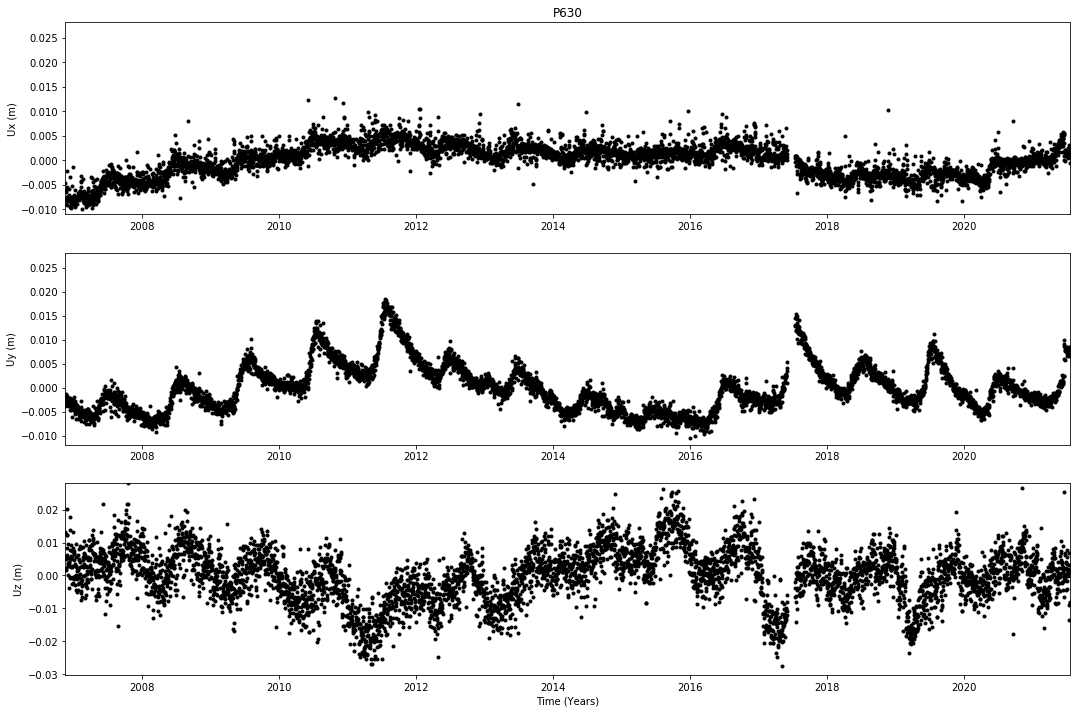

In [3]:
plot_station_time_series('P630', my_time_series)

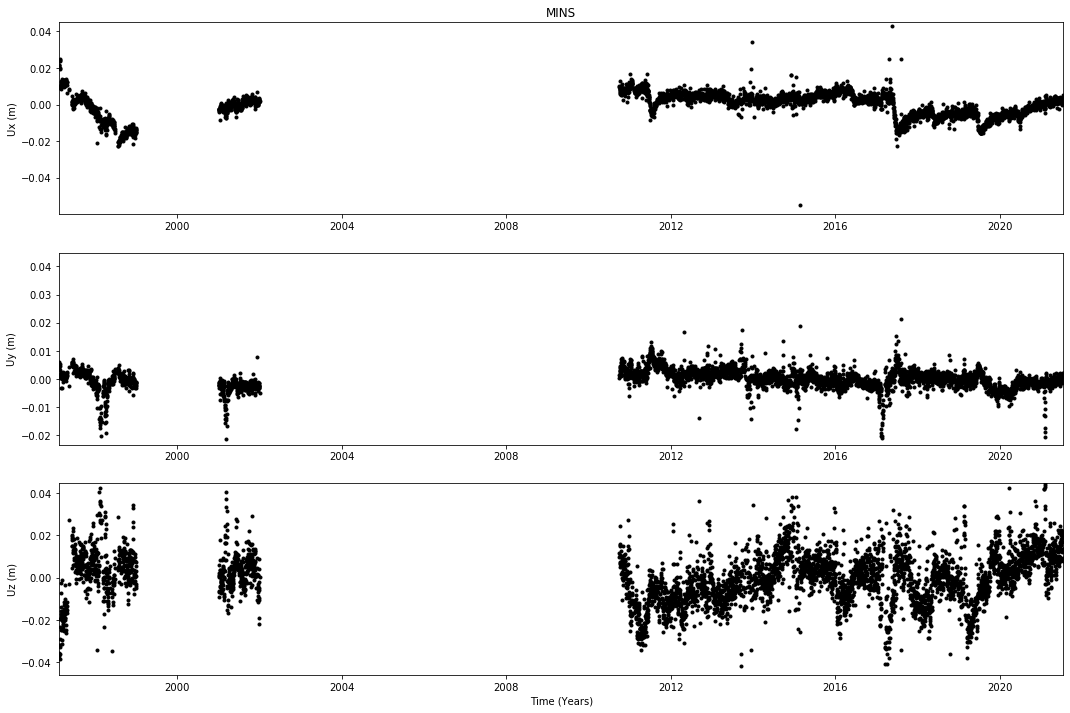

In [4]:
plot_station_time_series('MINS', my_time_series)

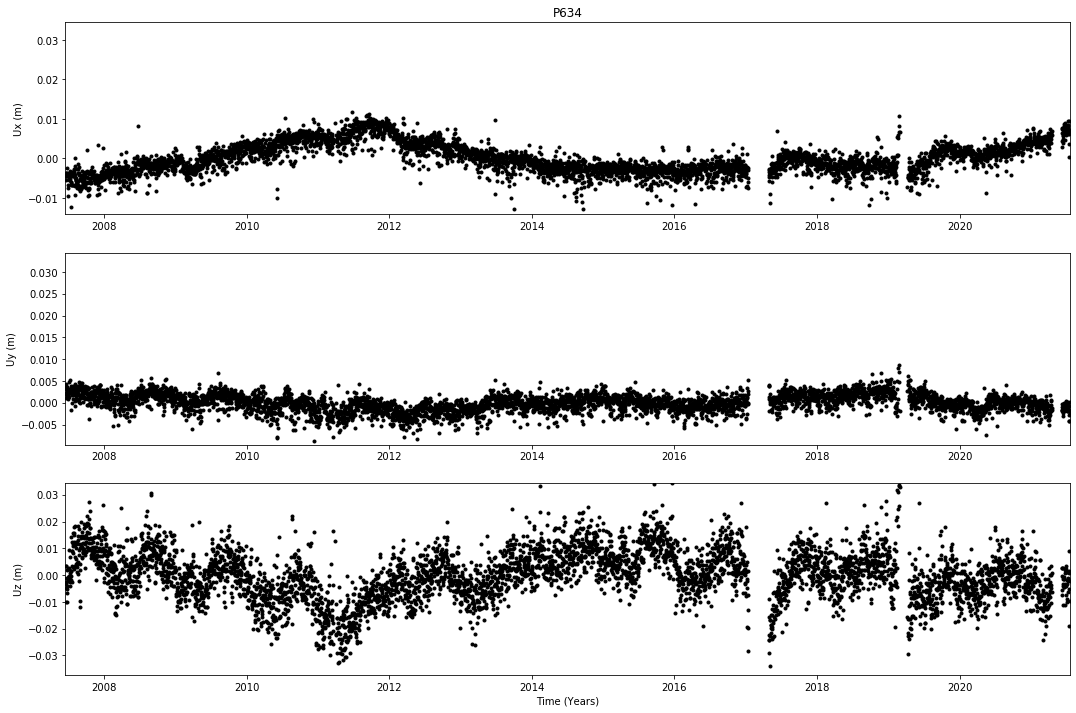

In [5]:
plot_station_time_series('P634', my_time_series)